# Protection of clients' personal data
Objective: protect the data of clients of an insurance company, develop a method for transforming data so that it is difficult to recover personal information from it and justify the correctness of its operation.

It is necessary to protect the data so that the quality of machine learning models does not deteriorate during conversion. There is no need to select the best model.

**Data Description**

Features: gender, age and salary of the insured, number of family members.

Target: number of insurance payments to the client over the last 5 years.

**Purpose of the study**

- Justify and propose a method for encrypting data
- Build an algorithm and compare predictions with and without encryption

**Brief report:**

Retrieved data from clients of the insurance company /datasets/insurance.csv.

The principle of operation of the algorithm is shown and an example is given on linear models.

## Data overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('D:\\jupyter_clone\\yandex-practicum\\15. Linear algebra\\insurance.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


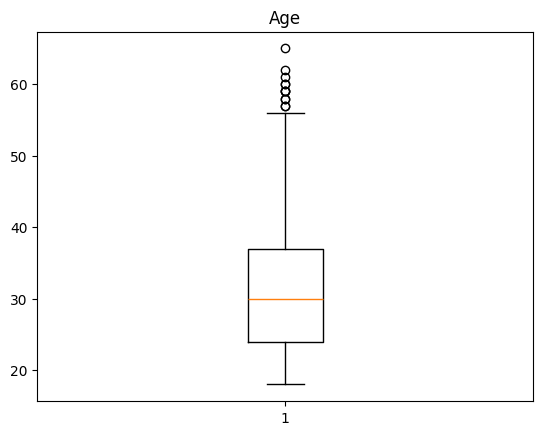

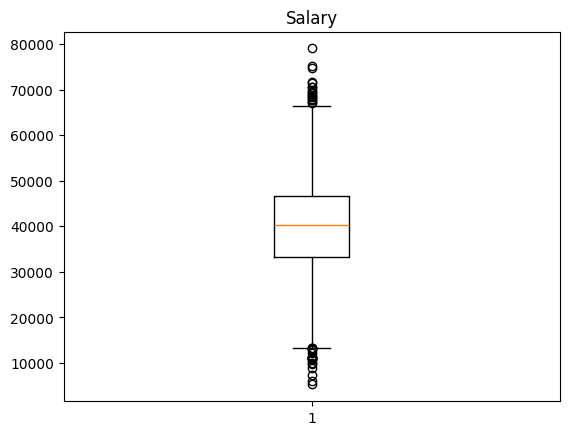

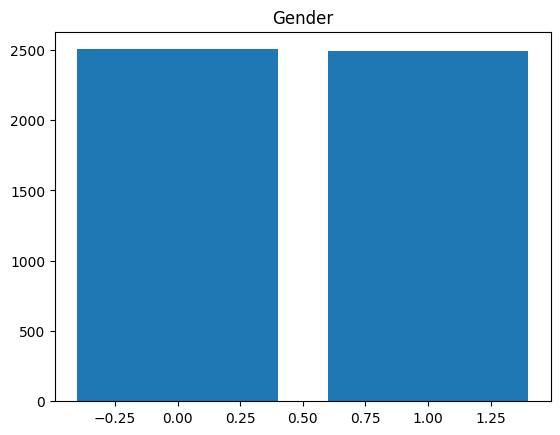

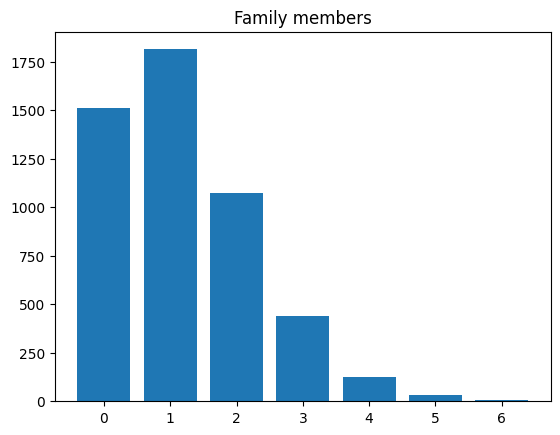

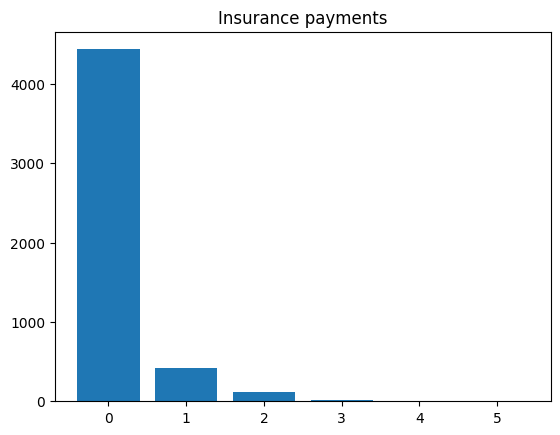

In [3]:
plt.boxplot(data['Возраст'])
plt.title('Age')
plt.show()

plt.boxplot(data['Зарплата'])
plt.title('Salary')
plt.show()

plt.bar(data['Пол'].value_counts().keys(), data['Пол'].value_counts())
plt.title('Gender')
plt.show()

plt.bar(data['Члены семьи'].value_counts().keys(), data['Члены семьи'].value_counts())
plt.title('Family members')
plt.show()

plt.bar(data['Страховые выплаты'].value_counts().keys(), data['Страховые выплаты'].value_counts())
plt.title('Insurance payments')
plt.show()

Median age: 30 years

Median salary: 40,000

No discrepancies by gender

There are fewer singles than couples

Most often there are no insurance payments, each subsequent payment is less frequent
## Matrix multiplication

The features are multiplied by an invertible matrix. Will the quality of linear regression change? (It can be retrained.)

Symbols:

- $X$ — feature matrix (zero column consists of ones)

- $y$ —  target feature vector

- $P$ — matrix by which features are multiplied

- $w$ — vector of linear regression weights (zero element equals to shift)

Predictions:

$$
a = Xw
$$

Learning objective:

$$
w = \arg\min_w MSE(Xw, y)
$$

Learning formula:

$$
w = (X^T X)^{-1} X^T y
$$

Let's replace $X$ with $XP$, where $P$ is a square matrix, $w$ would then turn into $w'$, modified regression weights vector

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = P^{-1} (X^T X)^{-1}(P^T)^{-1}  P^TX^T y
$$
$$
w' = P^{-1} (X^T X)^{-1}X^T y
$$
And inserting $w$ back into equasion

$$
w' = P^{-1} w
$$
$$
w = P w'
$$

Our predictions would turn into

$$
a = XPw'
$$

Meaning that if we multiply our to be predicted features $X$ by the matrix $P$ (key) and use a modified vector of regression weights $w'$, then our predictions will not change
## Conversion algorithm
1. Separate features and target, multiply training features by a square matrix $P$ with the side of the width of features

2. Calculate encrypted vectors of linear regression weights

3. Multiply predicted features by $P$

Let's create a linear regression class and compare it with sklearn

In [4]:
test = np.random.rand(3,3)
np.linalg.inv(test)@test

array([[ 1.00000000e+00, -6.85611211e-17,  2.45178859e-18],
       [-2.44061079e-17,  1.00000000e+00, -2.35194868e-16],
       [ 3.20608355e-17,  4.46376890e-17,  1.00000000e+00]])

In [5]:
class Linear:
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.w =  np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, features):
        self.w0 = self.w[0]
        self.w = self.w[1:]
        return features.dot(self.w) + self.w0

features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.33, random_state=1337)


model = Linear()
model.fit(features_train, target_train) 
predictions = model.predict(features_test) 
print('r2 score of a model without encryption:\n',r2_score(target_test, predictions))

key = np.random.rand(features.shape[1],features.shape[1]) # random key
features_train = features_train @ key # encrypting training features
model.fit(features_train, target_train) 

features_test = features_test @ key # encrypting test features (with the same key!)
predictions = model.predict(features_test)
print('r2 score of a model with encryption:\n',r2_score(target_test, predictions))

r2 score of a model without encryption:
 0.4255682770549981
r2 score of a model with encryption:
 0.42556846765758305


Metrics converge, model quality has not changed

Let's use sklearn

In [6]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.33, random_state=1337)


model = LinearRegression()
model.fit(features_train, target_train) 
predictions = model.predict(features_test) 
print('r2 score of a model without encryption:\n',r2_score(target_test, predictions))

key = np.random.rand(features.shape[1],features.shape[1]) # random key
features_train = features_train @ key # encrypting training features
model.fit(features_train, target_train) 
features_test = features_test @ key # encrypting test features (with the same key!)
predictions = model.predict(features_test) 
print('r2 score of a model with encryption:\n',r2_score(target_test, predictions))

r2 score of a model without encryption:
 0.42556827705499645
r2 score of a model with encryption:
 0.4255682770550939


Metrics converge
## Conclusion

An algorithm for data protection is presented, the principle of its operation is substantiated and tested using data from insurance company clients.